# COMPANY DATASET

IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report

READING THE DATASET

In [2]:
data=pd.read_csv(r"C:\Users\Sujal Sahu\Downloads\Company_Data.csv")
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


EDA

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [5]:
data.shape

(400, 11)

In [6]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [8]:
data=pd.get_dummies(data,columns=['Urban','US'], drop_first=True)

In [9]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [10]:
data["ShelveLoc"].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [11]:
label_encoder=LabelEncoder()
data['ShelveLoc']=label_encoder.fit_transform(data['ShelveLoc'])
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [14]:
data1=pd.DataFrame(data)
data1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [15]:
bins=[1,10,20]

In [16]:
groups=["low","high"]

In [17]:
data1["sales"]=pd.cut(data1.Sales,bins,labels=groups)
data1

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sales
0,9.50,138,73,11,276,120,0,42,17,1,1,low
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,high
3,7.40,117,100,4,466,97,2,55,14,1,1,low
4,4.15,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,high
396,6.14,139,23,3,37,120,2,55,11,0,1,low
397,7.41,162,26,12,368,159,2,40,18,1,1,low
398,5.94,100,79,7,284,95,0,50,12,1,1,low


In [18]:
data1.drop(['Sales'],axis=1,inplace=True)
data1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sales
0,138,73,11,276,120,0,42,17,1,1,low
1,111,48,16,260,83,1,65,10,1,1,high
2,113,35,10,269,80,2,59,12,1,1,high
3,117,100,4,466,97,2,55,14,1,1,low
4,141,64,3,340,128,0,38,13,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,high
396,139,23,3,37,120,2,55,11,0,1,low
397,162,26,12,368,159,2,40,18,1,1,low
398,100,79,7,284,95,0,50,12,1,1,low


In [19]:
data1["sales"].value_counts()

low     317
high     78
Name: sales, dtype: int64

In [21]:
label_encoder=LabelEncoder()
data1['sales']=label_encoder.fit_transform(data1['sales'])
data1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sales
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,1
397,162,26,12,368,159,2,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,1


SPLITTING INTO DEPENDENT AND INDEPENDENT VARIABLE

In [25]:
x=data1.iloc[:,0:10]
y=data1['sales']

In [26]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [27]:
y

0      1
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    1
Name: sales, Length: 400, dtype: int32

SPLITTING THE DATA INTO TRAIN AND TEST SPLIT

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
3,117,100,4,466,97,2,55,14,1,1
18,110,110,0,408,68,1,46,17,0,1
202,121,78,4,413,130,0,46,10,0,1
250,137,105,10,435,156,1,72,14,1,1
274,135,93,2,67,119,2,34,11,1,1
...,...,...,...,...,...,...,...,...,...,...
71,148,51,16,148,150,2,58,17,0,1
106,102,33,0,217,139,2,70,18,0,0
270,119,26,0,284,89,1,26,10,1,0
348,132,102,20,459,107,1,49,11,1,1


In [31]:
y_train

3      1
18     0
202    1
250    1
274    1
      ..
71     1
106    2
270    0
348    0
102    1
Name: sales, Length: 320, dtype: int32

BUILDING DECISION TREE CLASSIFIER USING ENTROPY CRITERIA

In [60]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=2)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

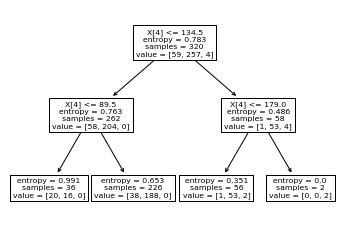

In [61]:
plot_tree(model)
plt.show()

PREDICTING ON TEST DATASET

In [62]:
preds=model.predict(x_test)
preds

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

In [63]:
pd.Series(preds).value_counts() #getting the count of each category

1    67
0    13
dtype: int64

In [64]:
y_test

209    1
280    1
33     1
210    1
93     1
      ..
246    1
227    1
369    0
176    1
289    1
Name: sales, Length: 80, dtype: int32

In [65]:
pd.DataFrame({"Actual":y_test,
             "Predicted":preds})

,Actual,Predicted
209,1,1
280,1,1
33,1,1
210,1,1
93,1,1
...,...,...
246,1,1
227,1,1
369,0,1
176,1,1


In [66]:
pd.crosstab(y_test,preds)

col_0,0,1
sales,,
0,8,11
1,5,55
2,0,1


In [67]:
preds==y_test

209     True
280     True
33      True
210     True
93      True
       ...  
246     True
227     True
369    False
176     True
289     True
Name: sales, Length: 80, dtype: bool

ACCURACY

In [69]:
np.mean((preds==y_test)*100)

78.75

BUILDING DECISION TREE CLASSIFIER (CART) USING GINI CRITERIA

In [70]:
model_gini=DecisionTreeClassifier(criterion="gini",max_depth=2)

In [71]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

PREDICTION AND COMPUTING THE ACCURACY

In [72]:
pred=model.predict(x_test)

In [74]:
np.mean((preds==y_test)*100)

78.75